In [51]:
# Phát biểu bài toán: có 5 thành phố được đánh số từ 1 đến 5 được nối với nhau
# một người muốn đi từ 1 thành phố, qua tất cả các thành phố khác và trở về thành phố ban đầu
# với chi phí nhỏ nhất. Hãy thiết lập tuyến đường cho người này.

# dữ liệu mô tả các thành phố và chi phí giữa chúng là một mảng 2 chiều
# dòng và cột đầu tiên là tên các thành phố
# các giá trị còn lại biểu diễn chi phí đi lại của hai thành phố tương ứng
# với những thành phố không nối trực tiếp với nhau, ta cho chi phí là một số lớn

import random

n = 5   # so luong thanh pho
m = 100  # so luong ca the trong quan the
n_generations = 300 # so vong doi
losses = []  # de ve bieu de losses

# load data
def load_data():
    map = []
    file = open('data_route.txt', 'r')
    lines = file.readlines()
    
    # bỏ header
    for i in range(1, len(lines)):
        strings = lines[i].split(',')
        
        # bỏ cột đầu tiên
        prices = [int(s.strip()) for s in strings[1:]]
        map.append(prices)
    file.close()
    return map

map = load_data()
print('load_data')
print(map)


# tao individual
def create_individual():
    # list cac thanh pho    
    return [random.randint(1,n) for _ in range(n)]

# tinh loss
def compute_loss(individual):
    i = 0
    price = 0
    while i < n-1:
        a = individual[i] - 1
        b = individual[i+1] - 1
        price += map[a][b]
        i += 1
    # cong voi quang duong tp cuoi ve tp dau
    start = individual[0] - 1
    finish = individual[n-1] - 1
    price += map[finish][start]
    
    # kiểm tra xem individual có chứa hết thành phố không
    s = set(individual)
    price += ((n-len(s)) * 1000)
    
    return price


# tinh fitness
def compute_fitness(individual):
    loss = compute_loss(individual)
    return 1 / (1 + loss)

# chon loc
def selection(sorted_population):
    index1 = random.randint(0, n-2)
    while True:
        index2 = random.randint(0, n-2)
        if index2 != index1:
            break
    individual = sorted_population[index1]
    if index2 > index1:
        individual = sorted_population[index2]
    return individual

# lai ghep:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()
    
    for i in range(n):
        if random.random() < crossover_rate:
            individual1_new[i] = individual2[i]
            individual2_new[i] = individual1[i]            
    
    return individual1_new, individual2_new

# dot bien
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()
    
    for i in range(n):
        if random.random() < mutation_rate:
            individual_m[i] = random.randint(1,n)
        
    return individual_m

# tao quan the moi
def create_new_population(soted_old_population):
    # luu vao losses
    losses.append(compute_loss(sorted_old_population[-1]))
    
    # in cac gia tri tot nhat qua tung doi
    # print(losses[-1])
    new_population = []
    while len(new_population) < m-2:
        # chon loc
        individual1 = selection(sorted_old_population)
        individual2 = selection(sorted_old_population)

        # lai ghep
        individual_c1, individual_c2 = crossover(individual1, individual2)

        # dot bien
        individual_m1 = mutate(individual_c1)
        individual_m2 = mutate(individual_c2)
    
        # cho vao quan the moi
        new_population.append(individual_m1)
        new_population.append(individual_m2)
    
    # cho 2 con dep nhat cua quan the cu vao quan the moi
    new_population.append(sorted_old_population[-1])
    new_population.append(sorted_old_population[-2])

    return new_population

# tao quan the ban dau
population = [create_individual() for _ in range(m)]

for _ in range(n_generations):
    sorted_old_population = sorted(population, key = compute_fitness)
    population = create_new_population(sorted_old_population)

load_data
[[1000, 12, 1000, 5, 7], [12, 1000, 14, 1000, 18], [1000, 14, 1000, 6, 19], [5, 1000, 6, 1000, 2], [7, 18, 19, 2, 1000]]


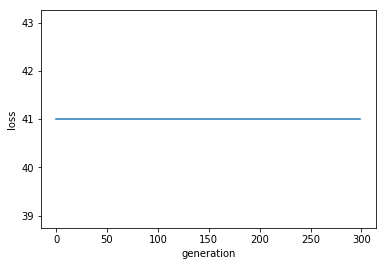

In [52]:
# bieu do su bien thien cua loss qua tung doi
import matplotlib.pyplot as plt
plt.plot(losses)
plt.xlabel('generation')
plt.ylabel('loss')
plt.show()

In [53]:
# hien thi tuyen duong ngan nhat
route_min = sorted_old_population[-1]
route_min.append(sorted_old_population[-1][0])
print('duong di ngan nhat: ', route_min, 'chi phi: ', losses[-1])

duong di ngan nhat:  [4, 3, 2, 1, 5, 4] chi phi:  41
